<a href="https://colab.research.google.com/github/technich214/Japanese-Driver-License-OCR/blob/master/JP_Driver_License_OCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Resolving Dependencies

Resolving Dependencies



In [89]:
%matplotlib inline

In [90]:
! apt install tesseract-ocr
! apt install libtesseract-dev
! pip install Pillow
! pip install pytesseract


Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libtesseract-dev is already the newest version (4.00~git2288-10f4998a-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [91]:
#Image upscaling stuff
! pip install --upgrade opencv-python
! pip install --upgrade opencv-contrib-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Downloading Japanese Tesseract model



In [92]:
#Downloading Tessaract
!wget https://github.com/tesseract-ocr/tessdata_best/raw/main/jpn.traineddata

--2022-06-22 17:29:48--  https://github.com/tesseract-ocr/tessdata_best/raw/main/jpn.traineddata
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/tesseract-ocr/tessdata_best/main/jpn.traineddata [following]
--2022-06-22 17:29:48--  https://raw.githubusercontent.com/tesseract-ocr/tessdata_best/main/jpn.traineddata
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14330109 (14M) [application/octet-stream]
Saving to: ‘jpn.traineddata.1’

jpn.traineddata.1   100%[===================>]  13.67M  87.0MB/s    in 0.2s    

2022-06-22 17:29:48 (87.0 MB/s) - ‘jpn.traineddata.1’ saved [14330109/14330109]



In [93]:
#Downloading upscaling model
!wget https://github.com/fannymonori/TF-ESPCN/blob/master/export/ESPCN_x3.pb

--2022-06-22 17:29:48--  https://github.com/fannymonori/TF-ESPCN/blob/master/export/ESPCN_x3.pb
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘ESPCN_x3.pb.2’

ESPCN_x3.pb.2           [ <=>                ] 129.75K  --.-KB/s    in 0.02s   

2022-06-22 17:29:49 (5.80 MB/s) - ‘ESPCN_x3.pb.2’ saved [132864]



In [94]:
!mv -v jpn.traineddata /usr/share/tesseract-ocr/4.00/tessdata/

renamed 'jpn.traineddata' -> '/usr/share/tesseract-ocr/4.00/tessdata/jpn.traineddata'


In [95]:
from google.colab import files

#Image Preprocessing
I have decided to ditch TrOCR cause  it is heavy asf and not build as advertise(not capable of detecting end to end entire text with pre processing img).

Instead i focus on image preprocessing and leave the rest of the ocr stuff for Google's tesseract ocr cause it is relatively accurate (better than easyocr anyway), yeah but still no where near as accurate as TrOCR but beggars cant be choosers. Tesseract OCR is super duper lightweight, easily capable of running on mobile devices without relying on servers and it is way way way easier to implement.

And another reason is that. I dont have a 10k+ dolars rig to train that heavy ass model. I mean wth 300m parameters!!!!!, that is with me prunning the hell out of the model. As much as i love transformer architecture, one of it major weaknesses is that it is really parameter inefficient. I just hope that the first AGI doesnt require a planet size computer to run it :( 

This is the end of my rant.

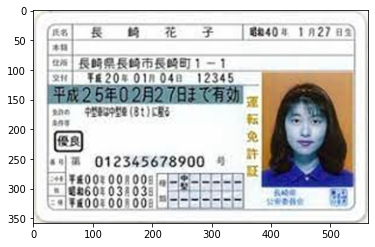

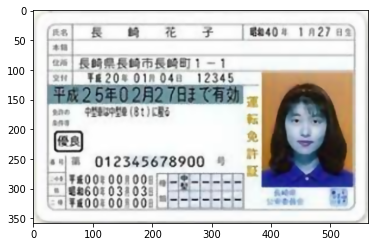

In [96]:
import matplotlib.pyplot as plt


#Upload ye file to google colab (just drag and drop) and put the path in img_path(right click the file, copy path)
img_path = "/content/download.jpeg"

img = cv2.imread(img_path)

#Rescaling image
img = cv2.resize(img, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)

plt.imshow(img)
plt.show()

img = cv2.bilateralFilter(img,9,75,75)
plt.imshow(img)
plt.show()

In [97]:
# #Saving Pics
# cv2.imwrite('img.jpg' , img)
# files.download('img.jpg')

#Image upscaling 


Due to time constraint i will use the model that comes with opencv. But later on whenever i have the time. I will use Real-ESRGAN
https://github.com/xinntao/Real-ESRGAN
For image upscaling. Real-ESRGAN is some next gen img upscalling shit. Like Cop movie "ENHANCED" stuff. Really impressive. But it is based on GAN so it will fill the missing information by randomly generating new stuff so if the photo is too low res it's gonna upscale wrong.
BTW another reason is that the author is also a weeb lmao. 
WEEB RACE MASTER RACE

In [98]:
# import cv2
# from cv2 import dnn_superres

# # Create an Super Resolution object
# sr = cv2.dnn_superres.DnnSuperResImpl_create()


# path = "/content/ESPCN_x3.pb"
# sr.readModel(path)


# #Set model and scale
# sr.setModel("espcn", 3)

# # Upscale the image
# plt.imshow(img)
# plt.show()
# result = sr.upsample(img)
# plt.imshow(result)
# plt.show()

#Slicing Up the image

Segmenting the image using opencv to improve Tessaract text recognition

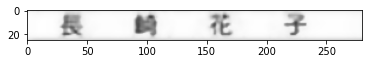

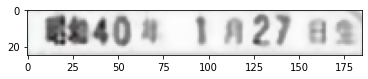

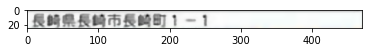

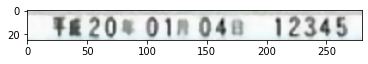

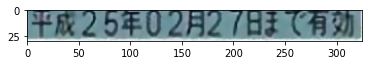

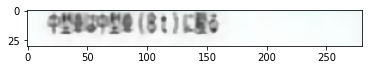

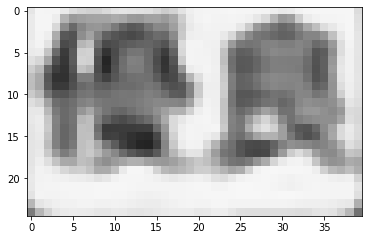

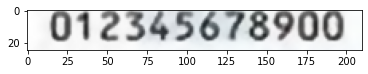

In [99]:
fullNameImg = img[25:50,70:350];
plt.imshow(fullNameImg)
plt.show()


birthDayImg = img[25:50,355:540];
plt.imshow(birthDayImg)
plt.show()

addressImg = img[75:100,70:540];
plt.imshow(addressImg)
plt.show()

issuedDateImg = img[100:125,70:350];
plt.imshow(issuedDateImg)
plt.show()

expireDateImg = img[130:160,30:355];
plt.imshow(expireDateImg)
plt.show()

licenseTypeImg = img[160:190,70:350];
plt.imshow(licenseTypeImg)
plt.show()


licenseLevelImg = img[210:235,40:80];
plt.imshow(licenseLevelImg)
plt.show()

licenseNumberImg = img[245:270,90:300];
plt.imshow(licenseNumberImg)
plt.show()

# Tesseract OCR

In [100]:
import pytesseract
import shutil
import os
import random
try:
 from PIL import Image
except ImportError:
 import Image

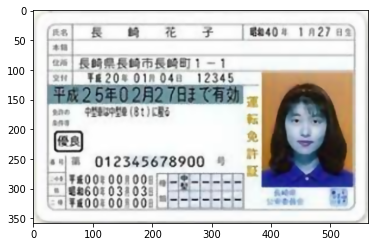

Full Name: 長 内 花子

Birthday: 旧名 404 1 月 27 日

Address: 長 縛 県 長 欠 市 長崎 名 1 ー1

Issued Date: き 205 01804B 12345

Expire Date: 半 旋 25 征 U り 2 月 2 / 日 は で て 有効

License Type: と 3 編 村 選

License Level: 優良

License Number: 012345678900



In [104]:
# img_path = "/content/Screenshot from 2022-06-22 21-40-28.png"
# img = cv2.imread(img_path, cv2.IMREAD_COLOR)
# img = cv2.bitwise_not(img)
plt.imshow(img)
plt.show()

fullName = pytesseract.image_to_string(fullNameImg,config='-l jpn --psm 6') 
birthDay = pytesseract.image_to_string(birthDayImg,config='-l jpn --psm 6') 
address = pytesseract.image_to_string(addressImg,config='-l jpn --psm 6') 
issuedDate = pytesseract.image_to_string(issuedDateImg,config='-l jpn --psm 6') 
expireDate = pytesseract.image_to_string(expireDateImg,config='-l jpn --psm 6') 
licenseType = pytesseract.image_to_string(licenseTypeImg,config='-l jpn --psm 6') 
licenseLevel = pytesseract.image_to_string(licenseLevelImg,config='-l jpn --psm 6') 
licenseNumber = pytesseract.image_to_string(licenseNumberImg,config='-l eng --psm 6') 


print('Full Name: '+fullName)
print('Birthday: '+birthDay)
print('Address: '+address)
print('Issued Date: '+issuedDate)
print('Expire Date: '+expireDate)
print('License Type: '+licenseType)
print('License Level: '+licenseLevel)
print('License Number: '+licenseNumber)

In [102]:
!ls /usr/share/tesseract-ocr/4.00/tessdata/

configs		 jpn.traineddata  pdf.ttf
eng.traineddata  osd.traineddata  tessconfigs


#TODO
Use Real-ESRGAN to increase the resolution significantly

Testing out other OCR model for japanese number because this aint gonna work. For normal text jpn tesseract works great. But for japanese text with english number. oh boy, 1 or 2 number between a forest of text is fine. But a bunch of numbers !! that is where stuff starting to go wrong

In [103]:
!ls /usr/share/tesseract-ocr/4.00/tessdata/

configs		 jpn.traineddata  pdf.ttf
eng.traineddata  osd.traineddata  tessconfigs
